In [32]:
import clustering
import load
import anndata as ad 
import scanpy as sc
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# latent = load.getLatentFromAnnData('/media/yob/hackathon/data/multi-modal/adata_example_latint.h5ad')

In [33]:
adata = sc.read('/media/yob/hackathon/data/multi-modal/adata_example_latint.h5ad')

In [34]:
adata

AnnData object with n_obs × n_vars = 42475 × 9048
    obs: 'imagerow', 'imagecol', 'mod_id', 'batch_id', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'r0.8', 'sample', 'batch', 'extra_categorical_covs', 'patient', 'tissue', 'seurat_clusters', 'ann'
    uns: '_scvi', 'neighbors', 'umap'
    obsm: 'X_mvae', 'X_mvae_umap3d', 'X_pca', 'X_umap', 'X_z1_p', 'X_z1_p_mod', 'X_z1_s', 'X_z2_p', 'X_z2_p_mod', 'X_z2_s', 'spatial', 'z1_p', 'z1_p_mod', 'z1_s', 'z2_p', 'z2_p_mod', 'z2_s', 'z_mvae'
    layers: 'x1', 'x1_batch_free', 'x1_poe', 'x2_1'
    obsp: 'connectivities', 'distances'

In [35]:
latent_anndata = load.exportLatent(adata,latent_key='z_mvae')
load.addMetadataFromPandas(latent_anndata,adata.obs)

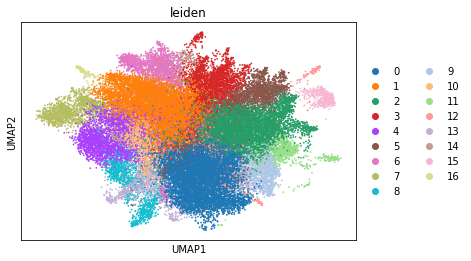

In [36]:
clusters = clustering.clusterLatentspace(latent_anndata,show_plot=True)

/home/cey/miniconda3/envs/Pytorch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/cey/miniconda3/envs/Pytorch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/cey/miniconda3/envs/Pytorch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/cey/miniconda3/envs/Pytorch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/cey/miniconda3/envs/Pytorch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name,

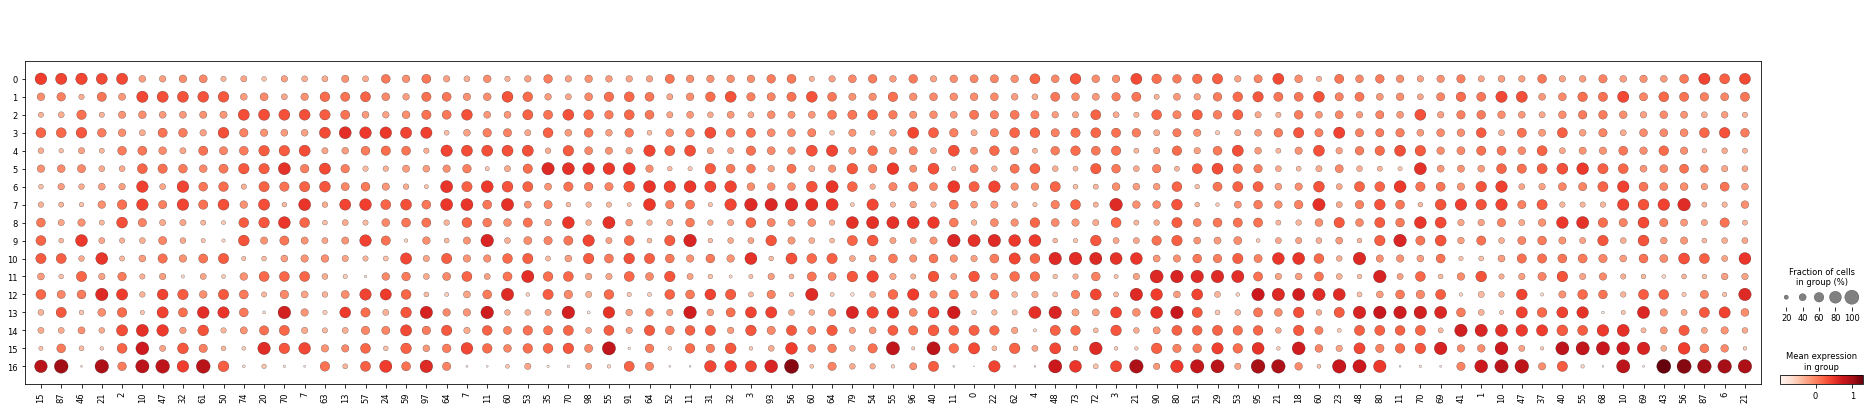

In [38]:
var_dimensions = clustering.plotVariableDimLatent(latent_anndata,num_features=5)
var_dimensions

/home/cey/miniconda3/envs/Pytorch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/cey/miniconda3/envs/Pytorch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/cey/miniconda3/envs/Pytorch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/cey/miniconda3/envs/Pytorch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/cey/miniconda3/envs/Pytorch/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name,

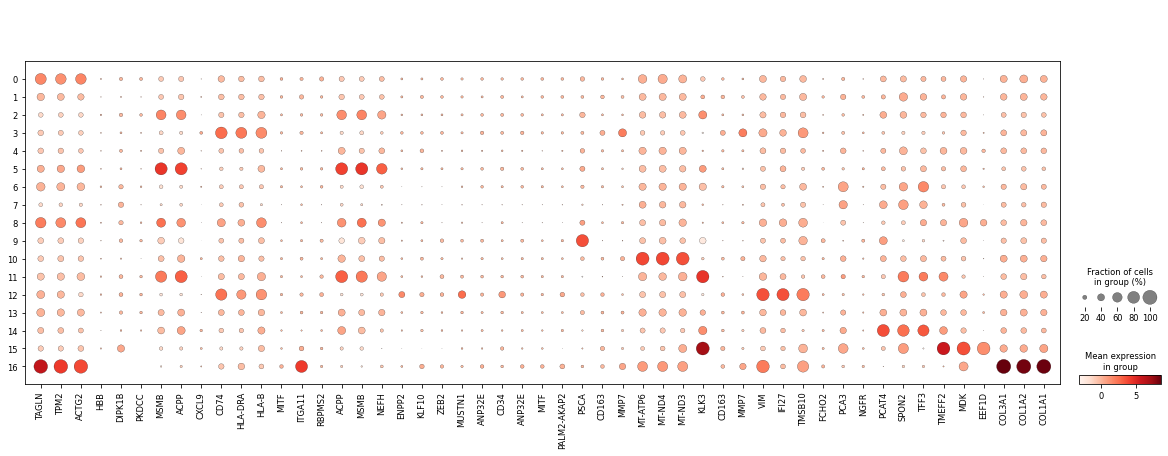

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,TAGLN,HBB,MSMB,CD74,MITF,ACPP,ENPP2,MUSTN1,ANP32E,PSCA,MT-ATP6,KLK3,VIM,FCHO2,PCAT4,TMEFF2,COL3A1
1,TPM2,DIPK1B,ACPP,HLA-DRA,ITGA11,MSMB,KLF10,ANP32E,MITF,CD163,MT-ND4,CD163,IFI27,PCA3,SPON2,MDK,COL1A2
2,ACTG2,PKDCC,CXCL9,HLA-B,RBPMS2,NEFH,ZEB2,CD34,PALM2-AKAP2,MMP7,MT-ND3,MMP7,TMSB10,NGFR,TFF3,EEF1D,COL1A1


In [40]:
clustering.variableLatentFeatures(adata,clusters)

In [41]:
latent_anndata

AnnData object with n_obs × n_vars = 42475 × 100
    obs: 'imagerow', 'imagecol', 'mod_id', 'batch_id', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'r0.8', 'sample', 'batch', 'extra_categorical_covs', 'patient', 'tissue', 'seurat_clusters', 'ann', 'leiden'
    uns: 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'wilcoxon', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'